In [14]:
len("I0817 12:13:27.343228 278244 pntpos.cpp:657]  estpos result:")

60

In [20]:
data = [[float(ele) for ele in line[15: -1].split()] for line in open("/persist/catkin_ws/llog").readlines()]
# print(data)

In [21]:
import pymap3d as pm
lat, lon, h = pm.ecef2geodetic(data[0][0], data[0][1], data[0][2])
enu = [list(pm.ecef2enu(x,y,z,lat,lon,h)) for x, y, z in data]
from pprint import pprint
pprint(enu)

[[-8.495426375385762e-10, -2.86009997983469e-10, -5.297902986493804e-10],
 [5.234114792638694, 5.012611579858334, -25.378217103447547],
 [1.0849970368467714, 0.1612003041150425, -17.994732592015897],
 [0.7107558663235469, -0.6835265950527081, -30.45867744218758],
 [-0.643758598262037, -1.488466284447793, -1.4797381049617166],
 [2.1259220996480996, -1.8061274310836541, -23.51807541464657],
 [-0.8699290205761967, -0.9258810545603802, -7.101044554507168],
 [-1.3011219225366264, -1.737782830022717, -3.5889195969856527],
 [-2.6486420772364445, -4.246639356040264, -13.185434388974665],
 [0.018033682552150765, -3.522341430976283, -15.186172822000248],
 [1.258350922827673, 0.5189231923857531, -11.530375262318229],
 [-0.809596390400813, -1.781272056988291, -24.236653823467403],
 [-0.7123210623114815, -4.237808822868893, -19.016544224117894],
 [1.8621259047157048, 0.41714997215131255, -13.454111106220658],
 [2.3454385369593567, -1.7289393199473153, -29.501088941571354],
 [1.4757892820496021, -1.

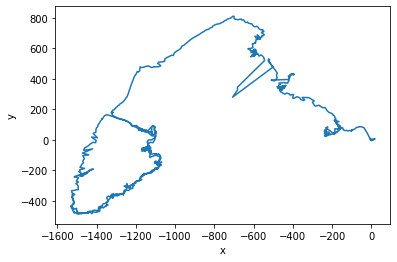

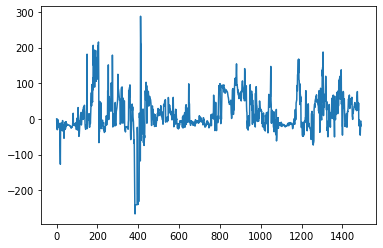

In [22]:
import numpy as np
enu = np.array(enu)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(enu[:,0], enu[:,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.plot(range(enu.shape[0]), enu[:,2])
plt.show() 


In [20]:
import pandas as pd
import numpy as np
import pymap3d as pm
from pprint import pprint
spp_res = "/persist/maplab_ws/res/20220811_184350/spp_result.txt"
spp_data = pd.read_csv(spp_res, sep=' ', skiprows=[0])
init_x, init_y, init_z = spp_data.iloc[0][1], spp_data.iloc[0][2], spp_data.iloc[0][3]
init_lat, init_lon, init_h = pm.ecef2geodetic(init_x, init_y, init_z)
print(init_x, init_y, init_z, init_lat, init_lon, init_h)
spp_data_enu = spp_data.apply(lambda x: pm.ecef2enu(x[1], x[2], x[3], init_lat, init_lon, init_h), axis=1)
pprint(spp_data_enu.tolist())

-2419036.661 5384855.488 2404965.766 22.3006233065327 114.19102895018186 -735.3221136984771
[(-0.0, -1.2924972786407912e-09, -5.301081919571292e-10),
 (-24.25989970494452, 13.376076225993145, 68.39180357371696),
 (-20.21584670259388, 63.52323213341271, 174.93770513550095),
 (-30.96062427335152, 70.09491016532121, 263.6645655549973),
 (-44.59337591248594, 80.22218494908024, 376.52095691648157),
 (-48.64915457362213, 75.55129476098321, 472.64686047716674),
 (-53.7317500504175, 71.17682106195178, 580.7494658162076),
 (-60.58435830196498, 101.4464587707601, 645.351689633427),
 (-69.2589176453672, 100.51773395415924, 674.8174514496889),
 (-79.37437766568763, 102.34142333364287, 707.5337028184522),
 (-81.21566500725939, 90.45740229350272, 717.9961957735866),
 (-83.37590088902107, 78.64878098853393, 730.1748882245887),
 (-75.48244882455, 91.11832757426532, 734.3573574060651),
 (-75.6020420724686, 84.73273193677343, 745.820798679018),
 (-75.77557526209395, 78.54878616452842, 756.9058990805959)

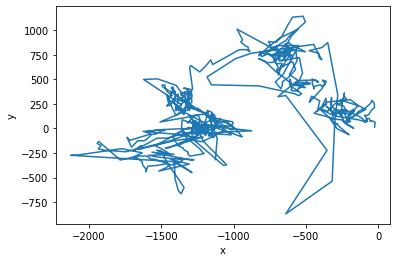

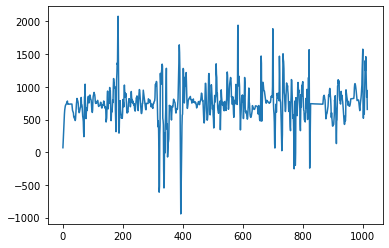

In [22]:
import matplotlib.pyplot as plt
spp_res = spp_data_enu.tolist()
spp_new_res = []
prev_ele = None
for i in range(len(spp_res)):
    if i == 0:
        prev_ele = spp_res[i]
        continue
    if abs(spp_res[i][0] - prev_ele[0]) < 1000 and abs(spp_res[i][1] - prev_ele[1]) < 1000 and abs(spp_res[i][2] - prev_ele[2]) < 1000:
        prev_ele = spp_res[i]
        spp_new_res.append(spp_res[i])
# print(spp_new_res)
spp_new_res = np.array(spp_new_res)
x = spp_new_res[:,0]
y = spp_new_res[:,1]
z = spp_new_res[:,2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.plot(range(len(z)), z, label='x')
plt.show()